---
title: 👩‍❤️‍💋‍👨Code-4-Deep-Learning
password: ""
tags:
  - 人工智能
  - 深度学习
  - python
katex: false
comments: true
aside: true
date: 2022-04-21 00:26:11
cover: https://www.helloimg.com/images/2022/04/21/RHe8xK.png
top_img:
---

<!--
 * @?: *********************************************************************
 * @Author: Weidows
 * @LastEditors: Weidows
 * @LastEditTime: 2022-04-20 23:11:24
 * @FilePath: \Blog-private\scaffolds\post.md
 * @Description:
 * @!: *********************************************************************
-->

## 序

此文为其他文章的代码部分:

> [⚡再啃-Deep-Learning](../../AI/DL)

也提供了 notebook 形式: [代码地址](https://github.com/Weidows-projects/public-post/blob/main/notebook/DL/DL.ipynb)

<a>![分割线](https://www.helloimg.com/images/2022/07/01/ZM0SoX.png)</a>


## 神经网络

### 感知器


In [10]:
def AND(x1, x2):
    w1, w2, theta = 0.5, 0.5, 0.7
    tmp = x1 * w1 + x2 * w2
    if tmp <= theta:
        return 0
    else:
        return 1


def OR(x1, x2):
    w1, w2, theta = 0.5, 0.5, 0.2
    tmp = x1 * w1 + x2 * w2
    if tmp <= theta:
        return 0
    else:
        return 1


# 非门只取一个输入,另一个不管
def NOT(x1, x2):
    w1, w2, theta = -1, 0, 0
    tmp = x1 * w1 + x2 * w2 + 1
    return tmp


# 异或门是非线性运算, 需要多层感知器组合
def XOR(x1, x2):
    # 异或门 = (与非门 与 或门)
    return AND(OR(x1, x2), not AND(x1, x2))


print(AND(0, 1), AND(1, 1), OR(0, 1), OR(0, 0))
print(NOT(0, 1), NOT(1, 1), NOT(0, 0), NOT(1, 0))
print(XOR(0, 1), XOR(1, 1), XOR(0, 0), XOR(1, 0))


0 1 1 0
1 0 1 0
1 0 0 1


<a>![分割线](https://www.helloimg.com/images/2022/07/01/ZM0SoX.png)</a>

## MNIST-手写数字识别

入门典中典 <sup id='cite_ref-1'>[\[1\]](#cite_note-1)</sup>


In [2]:
import torch
import torchvision
from torch.utils.data import DataLoader

# 超参
n_epochs = 3
batch_size_train = 64
batch_size_test = 1000
learning_rate = 0.01
momentum = 0.5
log_interval = 10
random_seed = 42
torch.manual_seed(random_seed)
MINST_mean = 0.1307
MINST_std = 0.3081

train_loader = torch.utils.data.DataLoader(torchvision.datasets.MNIST(
    './_data_set/',
    train=True,
    download=True,
    transform=torchvision.transforms.Compose([
        torchvision.transforms.ToTensor(),
        torchvision.transforms.Normalize((MINST_mean, ), (MINST_std, ))
    ])),
                                           batch_size=batch_size_train,
                                           shuffle=True)
test_loader = torch.utils.data.DataLoader(torchvision.datasets.MNIST(
    './_data_set/',
    train=False,
    download=True,
    transform=torchvision.transforms.Compose([
        torchvision.transforms.ToTensor(),
        torchvision.transforms.Normalize((MINST_mean, ), (MINST_std, ))
    ])),
                                          batch_size=batch_size_test,
                                          shuffle=True)

batch_idx, (example_data, example_targets) = next(enumerate(train_loader))

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./_data_set/MNIST\raw\train-images-idx3-ubyte.gz to ./_data_set/MNIST\raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./_data_set/MNIST\raw\train-labels-idx1-ubyte.gz to ./_data_set/MNIST\raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./_data_set/MNIST\raw\t10k-images-idx3-ubyte.gz to ./_data_set/MNIST\raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./_data_set/MNIST\raw\t10k-labels-idx1-ubyte.gz to ./_data_set/MNIST\raw

torch.Size([64, 1, 28, 28])
tensor([1, 2, 8, 5, 2, 6, 9, 9, 9, 4, 0, 3, 9, 9, 5, 6, 7, 8, 8, 9, 2, 6, 9, 3,
        0, 5, 0, 7, 6, 1, 2, 0, 7, 4, 6, 0, 6, 9, 7, 0, 7, 3, 2, 5, 9, 0, 4, 8,
        3, 6, 4, 0, 3, 2, 6, 6, 3, 2, 2, 3, 6, 7, 8, 4])


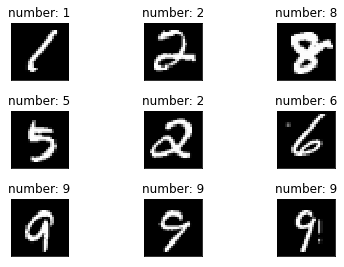

In [7]:
import matplotlib.pyplot as plt

# 每批次有 64 张单通道 28x28 大小的图片
print(example_data.shape)
# 每个图片实际的数字标签
print(example_targets)

fig = plt.figure()
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.tight_layout()
    plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
    # plt.title("数字: {}".format(example_targets[i]))
    plt.title(f'number: {example_targets[i]}')
    plt.xticks([])
    plt.yticks([])
plt.show()

In [ ]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # convolution
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.conv2_drop = nn.Dropout2d()
        # pooling
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        x = x.view(-1, 320)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)
        return F.log_softmax(x)


network = Net()
optimizer = optim.SGD(network.parameters(),
                      lr=learning_rate,
                      momentum=momentum)

train_losses = [] 
train_counter = []
test_losses = []
test_counter = [i * len(train_loader.dataset) for i in range(n_epochs + 1)]

In [ ]:
def train(epoch):
    network.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad()
        output = network(data)
        loss = F.nll_loss(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % log_interval == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))
            train_losses.append(loss.item())
            train_counter.append((batch_idx * 64) +
                                 ((epoch - 1) * len(train_loader.dataset)))
            torch.save(network.state_dict(), './model.pth')
            torch.save(optimizer.state_dict(), './optimizer.pth')


def test():
    network.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            output = network(data)
            test_loss += F.nll_loss(output, target, reduction='sum').item()
            pred = output.data.max(1, keepdim=True)[1]
            correct += pred.eq(target.data.view_as(pred)).sum()
    test_loss /= len(test_loader.dataset)
    test_losses.append(test_loss)
    print('\nTest set: Avg. loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))


if __name__ == '__main__':
    train(1)

    test()  # 不加这个，后面画图就会报错：x and y must be the same size
    for epoch in range(1, n_epochs + 1):
        train(epoch)
        test()


<a>![分割线](https://www.helloimg.com/images/2022/07/01/ZM0SoX.png)</a>

## 借物表

<a name='cite_note-1' href='#cite_ref-1'>[1]</a>: [用 PyTorch 实现 MNIST 手写数字识别(非常详细)](https://zhuanlan.zhihu.com/p/137571225)
